<a href="https://colab.research.google.com/github/PhuongAnh2212/ML-Model-Ensemble/blob/main/ML4DS_210101_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Support Vector Machine (SVM) and Model Ensemble {-}

This assignment aims at familiarizing you with training and testing Suppor Vector Machine classification model, along with exploiting the power of model ensemble technics. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Remove outliers and clean the data.
- Use GridSearchCV to find the best set of SVM hyperparameters.
- Build, train and evaluate the SVM model.
- Separately build, train and evaluate the other four classifiers (Logistic regression, Naive Bayes, Decision Tree, Random Forest) on the same dataset, then compare their performance with the SVM model's.
- Apply three model ensemble technics, i.e., Bagging, Boosting and Stacking, to solve the problem, then compare their performance with each other and with the use of individual models. Draw conclusion from what has been observed.

The dataset you will be working on is 'data-breast-cancer.csv'. It is composed of attributes to build a prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment4 (e.g., ML4DS-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

# Load the Data

In [ ]:
# Load the libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv("data-breast-cancer.csv")

In [ ]:
# Show some data samples
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features:

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



# Analyze the Data

In [ ]:
# Drop "Unnamed: 0" column
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


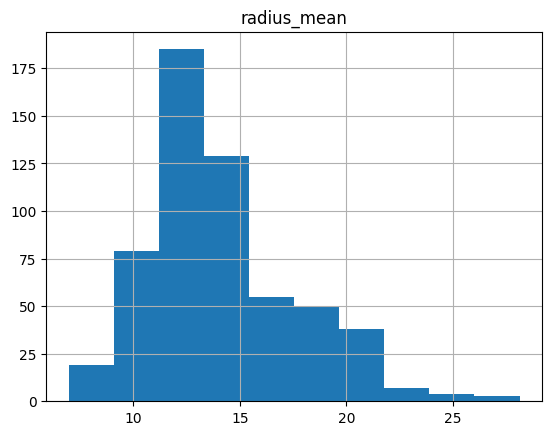

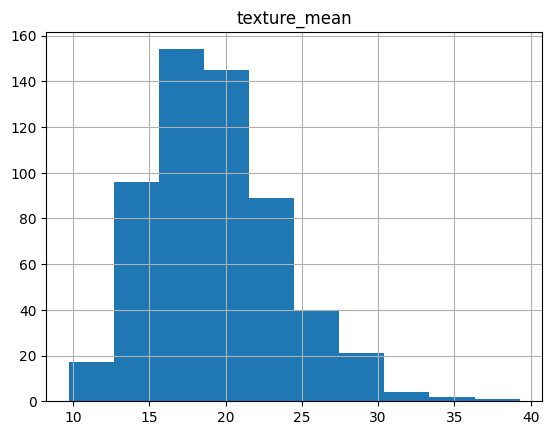

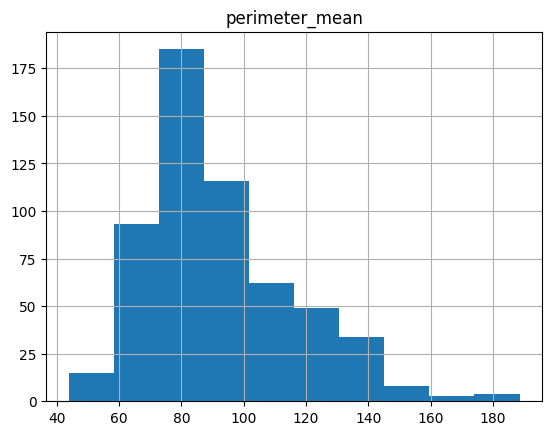

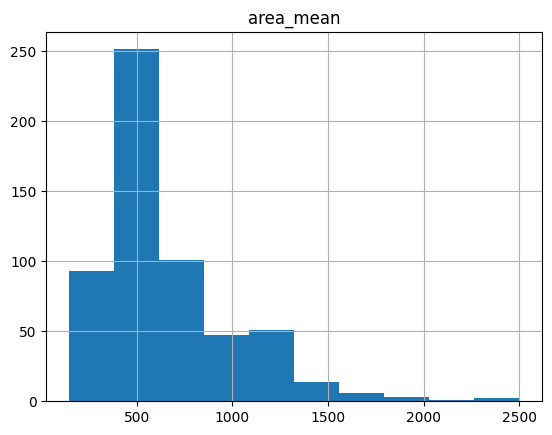

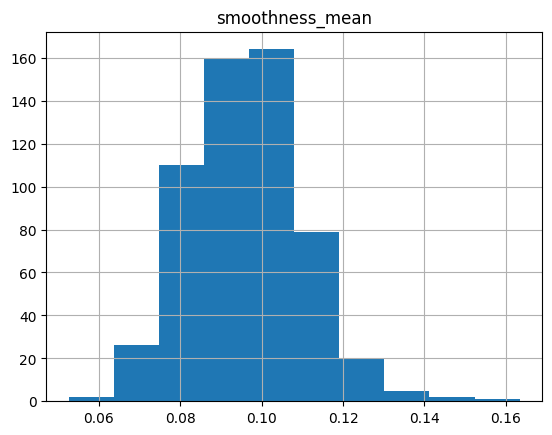

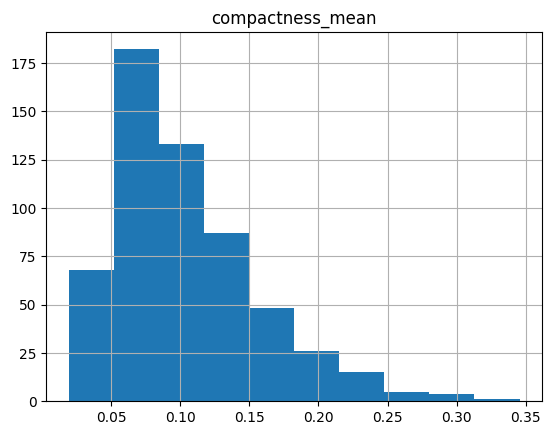

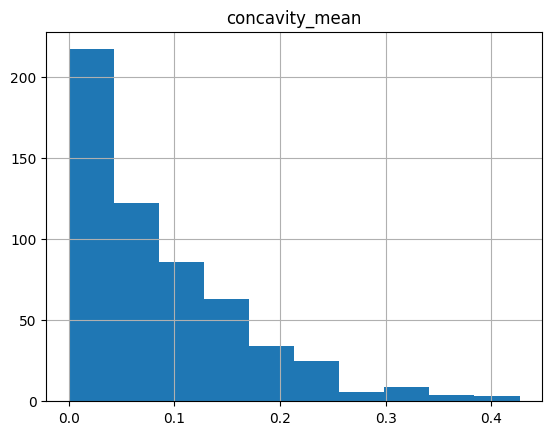

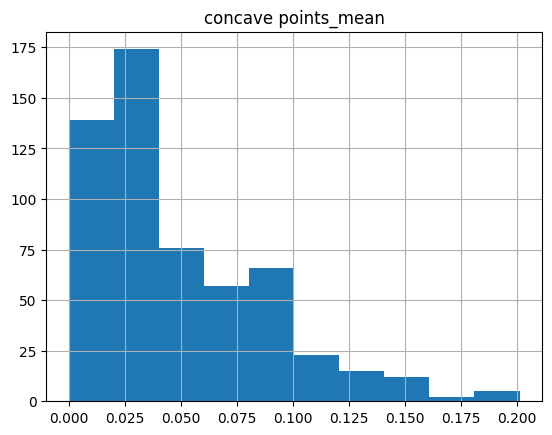

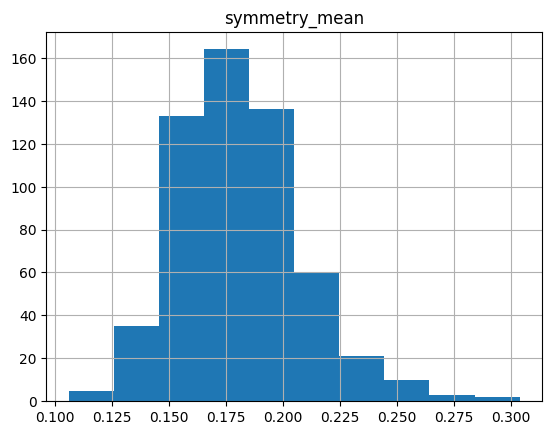

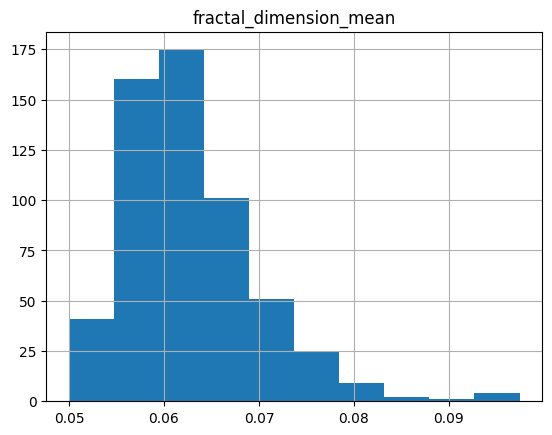

In [ ]:
# Plotting histograms for all numerical columns
import matplotlib.pyplot as plt
for column in df.select_dtypes(include='number').columns:
    plt.figure()
    df[column].hist()
    plt.title(column)
plt.show()

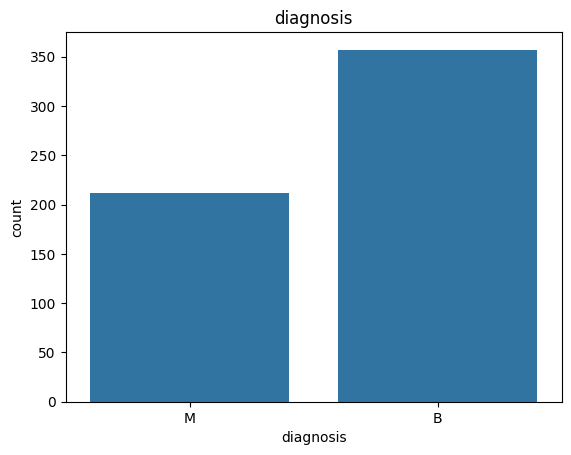

In [ ]:
# Plotting bar plots for all categorical columns
import seaborn as sns
for column in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.countplot(x=df[column], order=df[column].unique())
    plt.title(column)
plt.show()

In [ ]:
# Show data information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


(569, 11)

In [ ]:
data = df.copy()     # Create a copy of the data frame

# Remove outliers and clean the data.

In [ ]:
# Let us take the whisker as :The 2nd percentile and the 98th percentile of the data" to remove data outliers.

q = df['radius_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['radius_mean'] < q]

q = df['texture_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['texture_mean'] < q]

q = df['perimeter_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['perimeter_mean'] < q]

q = df['area_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['area_mean'] < q]

q = df['smoothness_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['smoothness_mean'] < q]

q = df['compactness_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['compactness_mean'] < q]

q = df['concavity_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['concavity_mean'] < q]

q = df['symmetry_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['symmetry_mean'] < q]

q = df['fractal_dimension_mean'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['fractal_dimension_mean'] < q]

df_clean.shape

(557, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df_clean['diagnosis'])
df_clean['diagnosis'] = label.transform(df_clean['diagnosis'])
df_clean

<ipython-input-14-7eece403aff9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['diagnosis'] = label.transform(df_clean['diagnosis'])


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


# Build, train, and test SVM model

In [ ]:
# Separate data features by removing the data label.
X = df_clean.drop(columns=["diagnosis"], axis=1)

# Assign data label to variable y
y = df_clean.diagnosis

# Split train/test with a random state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)

In [ ]:
# Show some training samples
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.01796,0.1601,0.05541
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.03341,0.1776,0.06907
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.11980,0.2113,0.07115
92,13.27,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.02648,0.1386,0.05318


In [ ]:
# Initialize and use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)     # Fit and transform thr training data
X_normalized_test = scaler.transform(X_test)           # Only transform the test data.

In [ ]:
# SVC is C-Support Vector Classification and its implementation is based on libsvm. The multiclass support is handled according to a one-vs-one scheme.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_normalized_train, y_train)

SVC()

In [ ]:
# Show evaluation metrics on the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, SVM.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.95      0.95      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



# Use GridSearchCV to find the best set of SVM hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000],
              "gamma": ["scale", 0.001, 0.005, 0.1]}
gridsearch = GridSearchCV(SVC(), param_grid, cv=10, scoring="f1", verbose=1)

In [ ]:
gridsearch.fit(X_normalized_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': ['scale', 0.001, 0.005, 0.1]},
             scoring='f1', verbose=1)

In [ ]:
gridsearch.best_params_

{'C': 1000, 'gamma': 0.005}

In [ ]:
# Re-run SVM with the best set of hyper-parameters.
SVM = SVC(C=gridsearch.best_params_['C'], gamma=gridsearch.best_params_['gamma'])
SVM.fit(X_normalized_train, y_train)

SVC(C=1000, gamma=0.005)

In [ ]:
# Show evaluation metrics on the test set
print(classification_report(y_test, SVM.predict(X_normalized_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.93      0.97      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()                      # Initialize Logistic Regression model
logmodel.fit(X_normalized_train, y_train)

LogisticRegression()

In [ ]:
# Calculate test accuracy
logmodel.score(X_normalized_test, y_test)

0.9642857142857143

In [ ]:
# Calculate prediction labels
predictions = logmodel.predict(X_normalized_test)                # Predict labels for X_test_scaler
final_prediction = pd.DataFrame({'target':predictions})      # Import labels to a dataframe
print(final_prediction)

     target
0         0
1         0
2         1
3         1
4         0
..      ...
107       1
108       1
109       0
110       1
111       1

[112 rows x 1 columns]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(logmodel.predict(X_normalized_test), y_test))
print("Recall: ", recall_score(logmodel.predict(X_normalized_test), y_test))
print("F1: ", f1_score(logmodel.predict(X_normalized_test), y_test))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(X_normalized_test), y_test))
print("Classification report: \n", classification_report(logmodel.predict(X_normalized_test), y_test))

Precision:  0.9743589743589743
Recall:  0.926829268292683
F1:  0.9500000000000001
Confusion matrix: 
 [[70  1]
 [ 3 38]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.97      0.93      0.95        41

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_normalized_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make prediction on the test data
predicted_label = naive_model.predict(X_normalized_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_label, y_test))
print(recall_score(predicted_label, y_test))
print(f1_score(predicted_label, y_test))
print(classification_report(predicted_label, y_test))

0.9230769230769231
0.972972972972973
0.9473684210526315
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.92      0.97      0.95        37

    accuracy                           0.96       112
   macro avg       0.95      0.97      0.96       112
weighted avg       0.97      0.96      0.96       112



# Decision Trees

In [ ]:
from imblearn.over_sampling import SMOTE     # Load the SMOTE library
smote = SMOTE(random_state=5)                # Initialize SMOTE
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before oversampling: " + str(X_train.shape))
print("After sampling: " + str(X_train_oversampling.shape))

Before oversampling: (445, 10)
After sampling: (552, 10)


In [ ]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [3, 5],                           # Maximum depth of the tree
         "min_samples_split": [4, 8]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [ ]:
# Run the search on oversampled training data samples.
grid_search.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [ ]:
# Best set of hyper-parameters found after searching
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 8}

In [ ]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [ ]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(max_depth=3, min_samples_split=8)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        73
           1       0.88      0.97      0.93        39

    accuracy                           0.95       112
   macro avg       0.93      0.95      0.94       112
weighted avg       0.95      0.95      0.95       112



# Random Forest

In [ ]:
# Building a RandomForest is similar to building a decision tree, but there is an additional hyper-parameter called n_estimators which is the number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on oversampled training data samples.
grid_search_rf.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16]})

In [ ]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 12}

In [ ]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=10, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [ ]:
# Train the Random Forest model
model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=12,
                       n_estimators=10, random_state=1)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96        73
           1       0.90      0.95      0.92        39

    accuracy                           0.95       112
   macro avg       0.94      0.95      0.94       112
weighted avg       0.95      0.95      0.95       112



# Ensemble

## Bagging

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Create a Bagging Classifier with SVM as the base model
# estimator: the base model
# n_estimators: the number of base models to use
# max_samples: the fraction (if float) or the number of samples (if integer) to draw from X_train to train each base estimator (with replacement by default, i.e., bootstrap)
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
bagging_clf = BaggingClassifier(estimator=SVM, n_estimators=10, max_samples=0.5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=0.8)
X_normalized_train = scaler.fit_transform(X_train)     # Fit and transform thr training data
X_normalized_test = scaler.transform(X_test)

In [ ]:
bagging_clf.fit(X_normalized_train, y_train)

BaggingClassifier(estimator=SVC(C=1000, gamma=0.005), max_samples=0.5)

In [ ]:
# Making predictions on the test set
y_pred = bagging_clf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9107142857142857


## Boosting with AdaBoost, Gradient Boosting and XGBoost

In [ ]:
# Create an AdaBoost Classifier with Decision Tree as the base model
# estimator: the base model
# n_estimators: the number of base models to use
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
ada_clf = AdaBoostClassifier(estimator = SVC(), n_estimators=10, algorithm='SAMME')

# Train the AdaBoost Classifier
ada_clf.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_ada = ada_clf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Classifier Accuracy:", accuracy_ada)

AdaBoost Classifier Accuracy: 0.7410714285714286


In [ ]:
# Create a Gradient Boosting Classifier which uses Decision Tree as boosting model by default
# n_estimators: the number of boosting stages to perform.
# learning_rate: learning rate shrinks the contribution of each tree by learning_rate, i.e., f_0 + lr*delta_1 + lr*delta_2 + ...
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)

# Train the Gradient Boosting Classifier
gb_clf.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_gb = gb_clf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

Gradient Boosting Classifier Accuracy: 0.9464285714285714


In [ ]:
# Create an XGBoost Classifier
# n_estimators: the number of boosting stages to perform.
# learning_rate: learning rate shrinks the contribution of each tree by learning_rate, i.e., f_0 + lr*delta_1 + lr*delta_2 + ...
# Reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1)

# Train the XGBoost Classifier
xgb_clf.fit(X_normalized_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_clf.predict(X_normalized_test)

# Evaluating the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 0.9375


## Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Ensemble the FIVE models using hard (majority) voting
estimators=[ ('svm', SVM), ('rf', model_rf), ('log_reg', logmodel), ('naive_bayes', naive_model), ('dt', model_dt)]    # Initialize base models in the ensemble
ensemble = VotingClassifier(estimators, voting='hard')                                      # Define how to ensemble them, i.e., hard voting

In [ ]:
# Train the model ensemble on the training set
ensemble.fit(X_normalized_train, y_train)          # Train the ensemble on the training set
ensemble.score(X_normalized_test, y_test)          # Test the ensemble on the test set

0.9285714285714286